In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6
warnings.filterwarnings('ignore')

In [2]:
import os 
os.chdir('C:\\College\\Machine Learnings\\Part 2 - Regression\\Section 6 - Polynomial Regression\\Polynomial_Regression')
os.getcwd()

'C:\\College\\Machine Learnings\\Part 2 - Regression\\Section 6 - Polynomial Regression\\Polynomial_Regression'

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')

In [4]:
##################### Missing values ############################

dataset.columns
X= dataset.iloc[:,1:2].values
Y= dataset.iloc[:,len(dataset.columns)-1].values

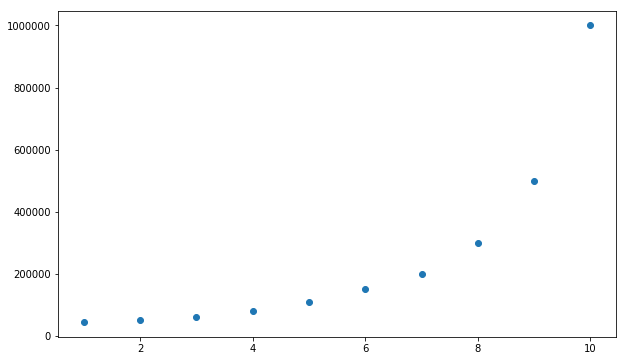

In [6]:
###############3 Lets look at the graph to decide whether to use Linear or Polynomial Graph #############
plt.scatter(X,Y)
plt.show()
### The graph looks similar to polynomial features 
### So we would do both linear and polynomial and test the result on both

In [7]:
###### Missing values ##############################
#### No Missing values ######################################
dataset[dataset['Position'].isna()]
dataset[dataset['Level'].isna()]
dataset[dataset['Salary'].isna()]

,Position,Level,Salary


In [8]:
###########  To Plot Level Vs Salary
### No Categorical variables so we can skip this part ##############################
###### Dataset is Low and we need actual prediction so we can skip the train and test set in this case ##################3
#### Feature scaling not required for 1 vs 1 variable ################################

In [44]:
from sklearn.tree import DecisionTreeRegressor
decisiontreeregressor = DecisionTreeRegressor(random_state=0)
decisiontreeregressor.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

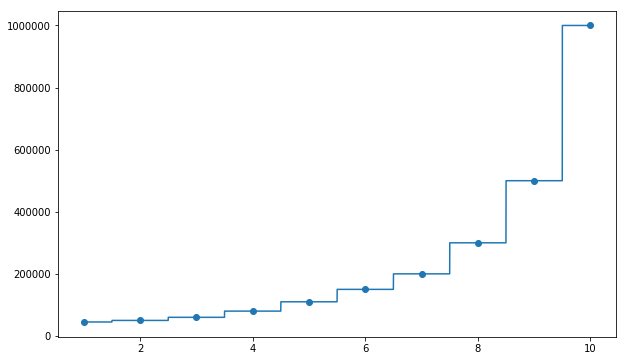

In [52]:
############ plot Decision tree ###########################
X_grid = np.arange(min(X),max(X),0.00001)
X_grid = np.reshape(X_grid,(len(X_grid),1))
plt.scatter(X,Y)
plt.plot(X_grid,decisiontreeregressor.predict(X_grid))
plt.show()

In [51]:
decisiontreeregressor.predict(6.5)

array([ 150000.])

In [62]:
import statsmodels.formula.api as sm
sm.OLS(decisiontreeregressor.predict(X_grid),X_grid).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                 2.741e+06
Date:                Sun, 11 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:06:46   Log-Likelihood:            -1.2060e+07
No. Observations:              900000   AIC:                         2.412e+07
Df Residuals:                  899999   BIC:                         2.412e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           4.58e+04     27.669   1655.477      0.000    4.58e+04    4.59e+04
==============================================================================
Omnibus:                   530264.225   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3722881.457
Skew:                           2.905   Prob(JB):                         0.00
Kurtosis:                      11.095   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""